In [1]:
import pandas as pd
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler


Bad key "text.kerning_factor" on line 4 in
D:\anaconda\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
# read file
stock_path = "C:/Users/acer/Desktop/LAB/lab2_2_3.csv"
stock_df = pd.read_csv(stock_path)

In [10]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format="%Y/%m/%d")

In [11]:
stock_df

,Date,Open,High,Low,Close,Change(%),market_Change(%),RSV,K,D,...,D(%),SMA(%),EMA(%),RSI(%),RISE,KR,DR,SMAR,EMAR,RSIR
0,2010-01-12,27.514700,28.830000,27.251699,27.567301,1.158100,-0.173601,75.128048,58.376016,52.792005,...,5.584011,1.432282,1.432282,34.20926483,1,1,1,1,1,1
1,2010-01-13,27.251699,29.461300,27.251699,29.461300,6.870455,-1.357631,100.000000,72.250677,59.278229,...,12.286375,2.217945,3.981222,11.76528431,1,1,1,1,1,1
2,2010-01-14,30.197800,31.513100,30.197800,31.513100,6.964391,1.139757,100.000000,81.500452,66.685637,...,12.496000,4.166085,4.812679,27.04417082,1,-1,1,1,1,-1
3,2010-01-15,33.669998,33.669998,33.669998,33.669998,6.844449,0.807109,100.000000,87.666968,73.679414,...,10.487681,4.971480,5.390591,0.893127514,1,-1,1,1,1,-1
4,2010-01-18,35.774399,35.984901,34.564400,35.984901,6.875269,-0.228187,100.000000,91.777978,79.712269,...,8.187979,6.098702,5.818715,4.021770969,1,-1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,83.333302,81.904480,77.871076,...,2.658650,1.174935,0.835216,9.756151101,1,-1,1,1,1,-1
2279,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,85.245876,83.018279,79.586810,...,2.203301,1.264515,1.205567,0,1,-1,1,1,1,-1
2280,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,96.774256,87.603605,82.259075,...,3.357673,1.401631,1.381961,0,1,-1,-1,1,1,-1
2281,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,100.000000,91.735736,85.417962,...,3.840169,2.814779,3.607053,0,1,-1,-1,1,1,-1


In [12]:
stock_df = pd.DataFrame(stock_df[["Open","High","Low","Close","Change(%)","market_Change(%)","RSV","K","D","SMA","EMA","RSI","K(%)","D(%)","SMA(%)","EMA(%)","RISE","KR","DR","SMAR","EMAR","RSIR"]].values,columns = ["Open","High","Low","Close","Change(%)","market_Change(%)","RSV","K","D","SMA","EMA","RSI","K(%)","D(%)","SMA(%)","EMA(%)","RISE","KR","DR","SMAR","EMAR","RSIR"],index = stock_df["Date"].values)

In [13]:
stock_df

,Open,High,Low,Close,Change(%),market_Change(%),RSV,K,D,SMA,...,K(%),D(%),SMA(%),EMA(%),RISE,KR,DR,SMAR,EMAR,RSIR
2010-01-12,27.514700,28.830000,27.251699,27.567301,1.158100,-0.173601,75.128048,58.376016,52.792005,25.414129,...,16.752032,5.584011,1.432282,1.432282,1.0,1.0,1.0,1.0,1.0,1.0
2010-01-13,27.251699,29.461300,27.251699,29.461300,6.870455,-1.357631,100.000000,72.250677,59.278229,25.977800,...,23.767743,12.286375,2.217945,3.981222,1.0,1.0,1.0,1.0,1.0,1.0
2010-01-14,30.197800,31.513100,30.197800,31.513100,6.964391,1.139757,100.000000,81.500452,66.685637,27.060057,...,12.802336,12.496000,4.166085,4.812679,1.0,-1.0,1.0,1.0,1.0,-1.0
2010-01-15,33.669998,33.669998,33.669998,33.669998,6.844449,0.807109,100.000000,87.666968,73.679414,28.405343,...,7.566236,10.487681,4.971480,5.390591,1.0,-1.0,1.0,1.0,1.0,-1.0
2010-01-18,35.774399,35.984901,34.564400,35.984901,6.875269,-0.228187,100.000000,91.777978,79.712269,30.137700,...,4.689350,8.187979,6.098702,5.818715,1.0,-1.0,1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,83.333302,81.904480,77.871076,55.357143,...,0.879924,2.658650,1.174935,0.835216,1.0,-1.0,1.0,1.0,1.0,-1.0
2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,85.245876,83.018279,79.586810,56.057142,...,1.359875,2.203301,1.264515,1.205567,1.0,-1.0,1.0,1.0,1.0,-1.0
2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,96.774256,87.603605,82.259075,56.842857,...,5.523272,3.357673,1.401631,1.381961,1.0,-1.0,-1.0,1.0,1.0,-1.0
2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,100.000000,91.735736,85.417962,58.442857,...,4.716851,3.840169,2.814779,3.607053,1.0,-1.0,-1.0,1.0,1.0,-1.0


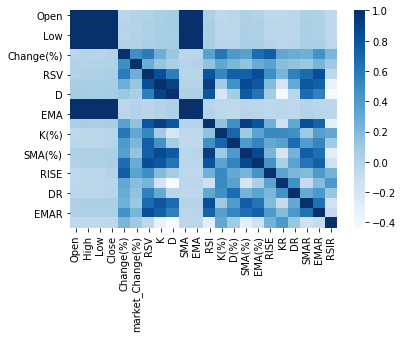

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = stock_df[:2282].corr()
sns.heatmap(corr,cmap="Blues")
plt.show()

In [15]:
scaler= MinMaxScaler(feature_range = (-1,1))
minmax_df = scaler.fit_transform(stock_df[["Change(%)","market_Change(%)","RSV","RSI","K(%)","D(%)","SMA(%)","EMA(%)"]])
minmax_df = pd.DataFrame(minmax_df,columns = ["Change(%)","market_Change(%)","RSV","RSI","K(%)","D(%)","SMA(%)","EMA(%)"],index = stock_df.index)
minmax_df["RISE"] = stock_df["RISE"].values

In [16]:
minmax_df

,Change(%),market_Change(%),RSV,RSI,K(%),D(%),SMA(%),EMA(%),RISE
2010-01-12,0.117873,0.129217,0.502561,0.342093,-0.619633,-0.354385,0.082550,0.140285,1.0
2010-01-13,0.690164,-0.088579,1.000000,0.499994,-0.566353,-0.209309,0.237017,0.639862,1.0
2010-01-14,0.699575,0.370801,1.000000,0.905655,-0.649628,-0.204772,0.620034,0.802823,1.0
2010-01-15,0.687559,0.309613,1.000000,0.922674,-0.689393,-0.248243,0.778381,0.916090,1.0
2010-01-18,0.690647,0.119176,1.000000,1.000000,-0.711241,-0.298021,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-25,0.072651,0.209914,0.666666,1.000000,-0.740172,-0.417706,0.031954,0.023264,1.0
2019-12-26,0.230340,0.150243,0.704918,1.000000,-0.736527,-0.427562,0.049566,0.095850,1.0
2019-12-27,0.190877,0.299985,0.935485,1.000000,-0.704908,-0.402575,0.076524,0.130423,1.0
2019-12-30,0.996951,0.103008,1.000000,1.000000,-0.711033,-0.392131,0.354358,0.566528,1.0


In [17]:
#hy parameter
EPOCH = 10000
BATCH_SIZE = 32
TIME_STEP = 30
INPUT_SIZE = 9
LR = 0.001

In [18]:
# declear training features data
features = []
for i in range(TIME_STEP,len(minmax_df)):
    x = minmax_df[i-TIME_STEP:i][["Change(%)","market_Change(%)","RSV","RSI","K(%)","D(%)","SMA(%)","EMA(%)","RISE"]].values
    features.append(x.tolist())
features = torch.FloatTensor(features)
print("size of feature: ",features.size())

# declear trainging labels data
labels = []
for i in range(TIME_STEP,len(minmax_df)):
    x = minmax_df[i:i+1]["RISE"]
    labels.append(x.tolist())
labels = torch.LongTensor(labels).view(-1)
print("size of label: ",labels.size())

size of feature:  torch.Size([2253, 30, 9])
size of label:  torch.Size([2253])


In [19]:
# random select 90% training set index and 10% testing set index 

x = np.linspace(0,2252,2253).tolist()
for i in range(0,2253):
    x[i] = int(x[i])

np.random.shuffle(x)
training, test = x[:2000], x[2000:]
test.sort()
training.sort()
train_features = features[training]
train_labels = labels[training]
test_features = features[test]
test_labels = labels[test]


In [20]:

#Mini-Batch

torch_dataset = Data.TensorDataset(train_features,train_labels)
train_loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 2,
    shuffle=True,
)

In [21]:
class LSTM(torch.nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm1 = torch.nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=128,         
            num_layers=1,
            batch_first=True,
        )
        self.lstm2 = torch.nn.LSTM(
            input_size=128,
            hidden_size=32,         
            num_layers=1,
            batch_first=True, 
        )
        self.dropout=torch.nn.Dropout(p=0.2)
        self.out = torch.nn.Linear(32,2)
        self.relu = torch.nn.ReLU(True)
        self.softmax = torch.nn.Softmax(dim = 1)
    def forward(self, x):
        lstm1_out,_ = self.lstm1(x,None)
        lstm1_out = self.dropout(lstm1_out)
        lstm1_out = self.relu(lstm1_out)
        lstm2_out,_ = self.lstm2(lstm1_out,None)
        lstm2_out = self.dropout(lstm2_out)
        lstm2_out = self.relu(lstm2_out)
        out = self.out(lstm2_out[:,-1,:])
        return self.softmax(out)

In [22]:
model = LSTM()
print(model)

LSTM(
  (lstm1): LSTM(9, 128, batch_first=True)
  (lstm2): LSTM(128, 32, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=32, out_features=2, bias=True)
  (relu): ReLU(inplace=True)
  (softmax): Softmax(dim=1)
)


In [23]:
# define optimizer and loss function 
optimizer = torch.optim.Adam(model.parameters(), lr=LR,weight_decay=0.00001)
# adject learning rate . when loss don't fall , lr = lr * factor  , min lr = 0.0001
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.9,min_lr=0.0001)
# crossentroy loss 
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
'''
Training 
'''
test_loss = []
train_loss = []
test_accuracy = []
train_accuracy = []
for epoch in range(EPOCH):
    loss_total = 0
    for step,(inputs,targets) in enumerate(train_loader):
        inputs = inputs.view(-1,TIME_STEP, INPUT_SIZE)
        #reshape the features to (batch,time_step*input_size)
        
        # start trainnig 
        output = model(inputs)
        
        # calculate loss  (cross entroy)
        loss = loss_func(output,targets)
        # clear the gradients of all optimized variables(from last training)
        optimizer.zero_grad()
        
        # back propagation
        loss.backward()
        optimizer.step()
        # sum of loss
        loss_total = loss_total + loss
        
        # print training info every 10 steps
        if((step+1) %10 == 0):
            # average of loss in 10 steps
            avg = loss_total / 10
            train_loss.append(avg.tolist())
            
            # calculate accuracy
            accuracy = 0
            for i in range(len(output)):
                if(output[i][0]>0.5 and targets[i] == 0.0):
                    accuracy  = accuracy +1
                elif(output[i][0]<0.5 and targets[i] == 1.0):
                    accuracy = accuracy +1
            accuracy = accuracy / len(output)
            train_accuracy.append(accuracy)
            
            test_output = model(test_features.view(-1,TIME_STEP,INPUT_SIZE))
            loss = loss_func(test_output,test_labels)
            test_loss.append(loss)
            
            accuracy2 = 0
            for i in range(len(test_output)):
                if(test_output[i][0]>0.5 and test_labels[i] == 0.0):
                    accuracy2  = accuracy2 +1
                elif(test_output[i][0]<0.5 and test_labels[i] == 1.0):
                    accuracy2 = accuracy2 +1
            accuracy2 = accuracy2 / len(test_output)
            test_accuracy.append(accuracy2)
            
            # print the epoch , steps , average loss , accuracy 
            print("Epoch: %4d|steps: %4d|Train Avg Loss: %.4f|Accuracy: %.4f | Test loss:%.4f| test accuracy :%.4f"
                  %(epoch+1,step+1,avg,accuracy,loss,accuracy2))
            
            # inital variable
            loss_total = 0
    # updata learning rate
    scheduler.step(loss)
        


Epoch:    1|steps:   10|Train Avg Loss: 0.6933|Accuracy: 0.5312 | Test loss:0.6933| test accuracy :0.5257
Epoch:    1|steps:   20|Train Avg Loss: 0.6945|Accuracy: 0.3750 | Test loss:0.6931| test accuracy :0.4941
Epoch:    1|steps:   30|Train Avg Loss: 0.6935|Accuracy: 0.4375 | Test loss:0.6928| test accuracy :0.5178
Epoch:    1|steps:   40|Train Avg Loss: 0.6929|Accuracy: 0.6250 | Test loss:0.6939| test accuracy :0.4980
Epoch:    1|steps:   50|Train Avg Loss: 0.6935|Accuracy: 0.5312 | Test loss:0.6930| test accuracy :0.4901
Epoch:    1|steps:   60|Train Avg Loss: 0.6934|Accuracy: 0.4688 | Test loss:0.6932| test accuracy :0.4783
Epoch:    2|steps:   10|Train Avg Loss: 0.6928|Accuracy: 0.5625 | Test loss:0.6927| test accuracy :0.5257
Epoch:    2|steps:   20|Train Avg Loss: 0.6936|Accuracy: 0.5625 | Test loss:0.6930| test accuracy :0.5178
Epoch:    2|steps:   30|Train Avg Loss: 0.6931|Accuracy: 0.5000 | Test loss:0.6931| test accuracy :0.5138
Epoch:    2|steps:   40|Train Avg Loss: 0.6941

Epoch:   14|steps:   10|Train Avg Loss: 0.6968|Accuracy: 0.2500 | Test loss:0.6911| test accuracy :0.5415
Epoch:   14|steps:   20|Train Avg Loss: 0.6916|Accuracy: 0.6250 | Test loss:0.6918| test accuracy :0.5375
Epoch:   14|steps:   30|Train Avg Loss: 0.6913|Accuracy: 0.5625 | Test loss:0.6924| test accuracy :0.5217
Epoch:   14|steps:   40|Train Avg Loss: 0.6926|Accuracy: 0.3750 | Test loss:0.6919| test accuracy :0.5415
Epoch:   14|steps:   50|Train Avg Loss: 0.6911|Accuracy: 0.5312 | Test loss:0.6927| test accuracy :0.5059
Epoch:   14|steps:   60|Train Avg Loss: 0.6925|Accuracy: 0.3750 | Test loss:0.6912| test accuracy :0.5415
Epoch:   15|steps:   10|Train Avg Loss: 0.6911|Accuracy: 0.4062 | Test loss:0.6911| test accuracy :0.5178
Epoch:   15|steps:   20|Train Avg Loss: 0.6937|Accuracy: 0.6250 | Test loss:0.6913| test accuracy :0.5059
Epoch:   15|steps:   30|Train Avg Loss: 0.6914|Accuracy: 0.5312 | Test loss:0.6917| test accuracy :0.5217
Epoch:   15|steps:   40|Train Avg Loss: 0.6924

Epoch:   27|steps:   10|Train Avg Loss: 0.6848|Accuracy: 0.6250 | Test loss:0.6975| test accuracy :0.4862
Epoch:   27|steps:   20|Train Avg Loss: 0.6925|Accuracy: 0.4688 | Test loss:0.6944| test accuracy :0.5099
Epoch:   27|steps:   30|Train Avg Loss: 0.6871|Accuracy: 0.5625 | Test loss:0.7001| test accuracy :0.4743
Epoch:   27|steps:   40|Train Avg Loss: 0.6800|Accuracy: 0.5625 | Test loss:0.6961| test accuracy :0.4901
Epoch:   27|steps:   50|Train Avg Loss: 0.6819|Accuracy: 0.5625 | Test loss:0.7011| test accuracy :0.4980
Epoch:   27|steps:   60|Train Avg Loss: 0.6901|Accuracy: 0.6250 | Test loss:0.7007| test accuracy :0.4980
Epoch:   28|steps:   10|Train Avg Loss: 0.6875|Accuracy: 0.4375 | Test loss:0.6920| test accuracy :0.5296
Epoch:   28|steps:   20|Train Avg Loss: 0.6872|Accuracy: 0.5625 | Test loss:0.6895| test accuracy :0.5534
Epoch:   28|steps:   30|Train Avg Loss: 0.6847|Accuracy: 0.6562 | Test loss:0.6910| test accuracy :0.5455
Epoch:   28|steps:   40|Train Avg Loss: 0.6824

Epoch:   40|steps:   10|Train Avg Loss: 0.6760|Accuracy: 0.6562 | Test loss:0.7101| test accuracy :0.4901
Epoch:   40|steps:   20|Train Avg Loss: 0.6835|Accuracy: 0.5625 | Test loss:0.7106| test accuracy :0.4743
Epoch:   40|steps:   30|Train Avg Loss: 0.6545|Accuracy: 0.4062 | Test loss:0.7145| test accuracy :0.4743
Epoch:   40|steps:   40|Train Avg Loss: 0.6681|Accuracy: 0.4688 | Test loss:0.7106| test accuracy :0.4941
Epoch:   40|steps:   50|Train Avg Loss: 0.6687|Accuracy: 0.4688 | Test loss:0.7093| test accuracy :0.5020
Epoch:   40|steps:   60|Train Avg Loss: 0.6770|Accuracy: 0.5000 | Test loss:0.7214| test accuracy :0.4625
Epoch:   41|steps:   10|Train Avg Loss: 0.6528|Accuracy: 0.7188 | Test loss:0.7237| test accuracy :0.4545
Epoch:   41|steps:   20|Train Avg Loss: 0.6633|Accuracy: 0.8125 | Test loss:0.7234| test accuracy :0.4901
Epoch:   41|steps:   30|Train Avg Loss: 0.6642|Accuracy: 0.6250 | Test loss:0.7208| test accuracy :0.4862
Epoch:   41|steps:   40|Train Avg Loss: 0.6657

In [ ]:
x = np.linspace(1,len(LOSS),len(LOSS))
y = np.array(LOSS)
plt.plot(x,y)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()